In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns

%load_ext lab_black

In [2]:
!pwd

/lustre1/project/stg_00090/scatac_benchmark/fixedcells_3_cistopic_consensus


In [3]:
os.chdir("/lustre1/project/stg_00090/scatac_benchmark/fixedcells_3_cistopic_consensus")

In [4]:
df = pd.read_csv(
    "../1_data_repository/cistarget/fixedcells_male_female_DARs/fixedcells_male_female_DARs_all_overlap_ENCODE3.NOMINNES.ctx",
    sep="\t",
)

In [5]:
df

,#GeneSignatureID,Rank,FeatureID,FeatureDescription,FeatureAnnotations,FeatureDatabase,AUC,NES,CandidateTargetIDs,TopTargetIDs,TopTargetRanks
0,VIB_10xv2_2.FIXEDCELLS__sampleA_Cytotoxic_T_ce...,1,dbcorrdb__CEBPB__ENCSR000EFM_1__m1,"CEBPB (ENCSR000EFM-1, motif 1)",CEBPB,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.052624,8.758922,chr1:23897169-23897384;chr12:118307075-1183074...,chr1:23897169-23897384;chr12:118307075-1183074...,904;1890;4351;4487;13278
1,VIB_10xv2_2.FIXEDCELLS__sampleA_Cytotoxic_T_ce...,2,hocomoco__NFIL3_HUMAN.H11MO.0.D,NFIL3_HUMAN,NFIL3,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.049558,8.222231,chr1:23897169-23897384;chr1:107877173-10787749...,chr1:23897169-23897384;chr1:107877173-10787749...,1362;2268;2955;6943;12137
2,VIB_10xv2_2.FIXEDCELLS__sampleA_Cytotoxic_T_ce...,3,dbcorrdb__CEBPB__ENCSR000EEX_1__m1,"CEBPB (ENCSR000EEX-1, motif 1)",CEBPB,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.048851,8.098532,chr1:23897169-23897384;chr1:107877173-10787749...,chr1:23897169-23897384;chr1:107877173-10787749...,635;2982;4426;5922;14174
3,VIB_10xv2_2.FIXEDCELLS__sampleA_Cytotoxic_T_ce...,4,dbcorrdb__NFE2__ENCSR000FAF_1__m1,"NFE2 (ENCSR000FAF-1, motif 1)",NFE2,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.048401,8.019840,chr3:172135818-172136153;chr8:29373215-2937356...,chr3:172135818-172136153;chr8:29373215-2937356...,1064;1229;2638;9312
4,VIB_10xv2_2.FIXEDCELLS__sampleA_Cytotoxic_T_ce...,5,predrem__nrMotif1111,161_fMuscle_arm-DS17765.M1107,NaN,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.047112,7.794238,chr2:207501864-207502050;chr7:140053867-140054...,chr2:207501864-207502050;chr7:140053867-140054...,244;976;2777;18070
...,...,...,...,...,...,...,...,...,...,...,...
573534,CNA_10xv11_3.FIXEDCELLS__sampleB_B_cell_VS_sam...,2598,predrem__nrMotif1685,38_fBrain-DS20231.M184,NaN,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.014599,1.006912,chr9:128554003-128554271,chr9:128554003-128554271,7013
573535,CNA_10xv11_3.FIXEDCELLS__sampleB_B_cell_VS_sam...,2599,cisbp__M0637,M0637,NaN,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.014581,1.005234,chr5:66169541-66169890,chr5:66169541-66169890,7018
573536,CNA_10xv11_3.FIXEDCELLS__sampleB_B_cell_VS_sam...,2600,transfac_pro__M06309,V$ZNF678_02: ZNF678,ZNF678,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.014570,1.004228,chr14:74793607-74793808,chr14:74793607-74793808,7021
573537,CNA_10xv11_3.FIXEDCELLS__sampleB_B_cell_VS_sam...,2601,elemento__ACGCCCC,Conserved regulatory element ACGCCCC between H...,NaN,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.014555,1.002885,chr7:105875310-105875538,chr7:105875310-105875538,7025


In [6]:
df["sample"] = [x.split("__")[0] for x in df["#GeneSignatureID"]]

df["cell_type"] = [x.split("__")[1] for x in df["#GeneSignatureID"]]

df["sample__cell_type"] = df["sample"] + "__" + df["cell_type"]

df["tech"] = [x.split("__")[0].split("_")[1] for x in df["#GeneSignatureID"]]

df["rank_within_GeneSignatureID"] = df.groupby("#GeneSignatureID")["NES"].rank(
    "dense", ascending=False
)

df["cell_type_short"] = [
    "_".join(x.split("_VS")[0].split("_")[1:]) for x in df["cell_type"]
]

df["donor"] = [x.split("_")[0] for x in df["cell_type"]]

df["donor_cell_type"] = df["donor"] + "_" + df["cell_type_short"]
df["tech_donor_cell_type"] = (
    df["tech"] + "_" + df["donor"] + "_" + df["cell_type_short"]
)

In [7]:
df_filtered = df[df["Rank"] <= 100]
df_filtered["FeatureAnnotations"].fillna(df_filtered["FeatureID"], inplace=True)

/staging/leuven/stg_00002/lcb/fderop/software_2/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [8]:
df_filtered["FeatureAnnotations_sets"] = [
    set(x.split(",")) for x in df_filtered["FeatureAnnotations"]
]

/user/leuven/330/vsc33042/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
df_filtered.groupby("sample__cell_type")["tech"].value_counts().unique()

array([100])

<AxesSubplot:xlabel='tech', ylabel='donor_cell_type'>

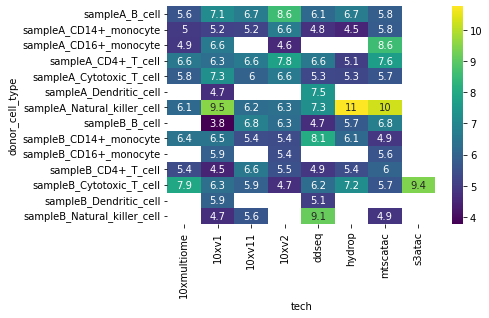

In [10]:
df_pivot = df_filtered.pivot_table(
    columns="tech", index="donor_cell_type", aggfunc="median"
)["NES"]
df_pivot = df_pivot.loc[sorted(list(df_pivot.index))]
sns.heatmap(df_pivot, cmap="viridis", annot=True)

In [11]:
df_filtered_counts = pd.DataFrame(
    df_filtered.groupby(
        ["tech", "donor", "cell_type_short", "FeatureAnnotations"]
    ).size()
)
df_filtered_counts

0
tech        donor   cell_type_short  FeatureAnnotations    
10xmultiome sampleA B_cell           AEBP2                1
                                     ATF2                 2
                                     ATF3                 1
                                     ATF7                 1
                                     BCL11A               1
...                                                      ..
s3atac      sampleB Cytotoxic_T_cell TBL1XR1              1
                                     cisbp__M5864         1
                                     cisbp__M6485         1
                                     elemento__ACTTCCTC   1
                                     predrem__nrMotif551  1

[9090 rows x 1 columns]

In [12]:
df_filtered_counts = pd.DataFrame(
    df_filtered.groupby(
        ["tech", "donor", "cell_type_short", "FeatureAnnotations"]
    ).size()
)
df_filtered_counts = (
    df_filtered_counts.reset_index()
    .sort_values(by=["tech", "donor", "cell_type_short", 0], ascending=False)
    .set_index(["tech", "donor", "cell_type_short", "FeatureAnnotations"])
)
df_filtered_counts

0
tech        donor   cell_type_short  FeatureAnnotations       
s3atac      sampleB Cytotoxic_T_cell SPI1                   28
                                     SPIB                   12
                                     SPIC                    6
                                     ELF5                    5
                                     EP300                   4
...                                                         ..
10xmultiome sampleA B_cell           transfac_pro__M09172    1
                                     transfac_pro__M09327    1
                                     transfac_pro__M09556    1
                                     transfac_pro__M09571    1
                                     yetfasco__YCR106W_506   1

[9090 rows x 1 columns]

# NES for specific motifs

https://www.nature.com/articles/nri.2016.90#Sec6

<AxesSubplot:xlabel='tech', ylabel='donor_cell_type'>

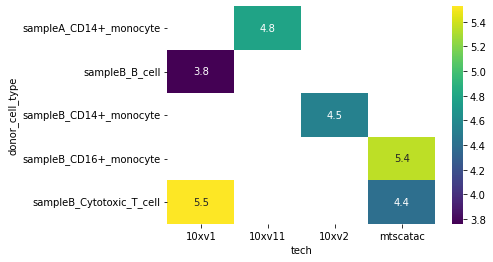

In [38]:
motif = "IRF7"
df_pivot = df_filtered[df_filtered["FeatureAnnotations"] == motif].pivot_table(
    columns="tech", index="donor_cell_type", aggfunc="mean"
)["NES"]
df_pivot = df_pivot.loc[sorted(list(df_pivot.index))]
sns.heatmap(df_pivot, cmap="viridis", annot=True)

<AxesSubplot:xlabel='tech', ylabel='donor_cell_type'>

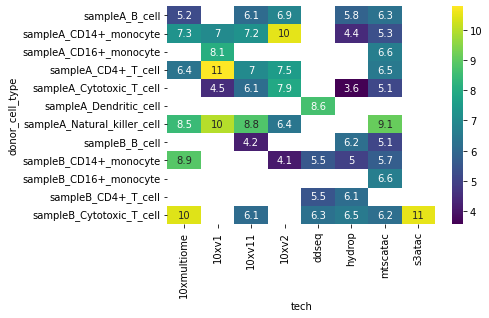

In [39]:
motif = "STAT3"
df_pivot = df_filtered[df_filtered["FeatureAnnotations"] == motif].pivot_table(
    columns="tech", index="donor_cell_type", aggfunc="median"
)["NES"]
df_pivot = df_pivot.loc[sorted(list(df_pivot.index))]
sns.heatmap(df_pivot, cmap="viridis", annot=True)

In [37]:
motif = "IFNG"
df_pivot = df_filtered[df_filtered["FeatureAnnotations"] == motif].pivot_table(
    columns="tech", index="donor_cell_type", aggfunc="median"
)["NES"]
df_pivot = df_pivot.loc[sorted(list(df_pivot.index))]
sns.heatmap(df_pivot, cmap="viridis", annot=True)

KeyError: 'NES'

In [ ]:
motif = "IRF5"
df_pivot = df_filtered[df_filtered["FeatureAnnotations"] == motif].pivot_table(
    columns="tech", index="donor_cell_type", aggfunc="median"
)["NES"]
df_pivot = df_pivot.loc[sorted(list(df_pivot.index))]
sns.heatmap(df_pivot, cmap="viridis", annot=True)

In [21]:
ax_dict = UpSet(df_filtered_counts, subset_size='count').plot()

ValueError: The DataFrame has values in its index that are not boolean

# Try tSNE

In [114]:
from __future__ import print_function
import time

import numpy as np
import pandas as pd

# from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

In [123]:
df_nes = (
    df.pivot(columns="FeatureID", index="sample__cell_type", values="NES").fillna(0).T
)

In [124]:
pca = PCA(n_components=5)
pca_result = pca.fit_transform(df_nes)

In [125]:
pca.explained_variance_ratio_

array([0.25948064, 0.09513268, 0.07142293, 0.03334071, 0.02997264])

In [126]:
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)

In [127]:
tsne_results = tsne.fit_transform(df_nes)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 24441 samples in 0.005s...
[t-SNE] Computed neighbors for 24441 samples in 12.234s...
[t-SNE] Computed conditional probabilities for sample 1000 / 24441
[t-SNE] Computed conditional probabilities for sample 2000 / 24441
[t-SNE] Computed conditional probabilities for sample 3000 / 24441
[t-SNE] Computed conditional probabilities for sample 4000 / 24441
[t-SNE] Computed conditional probabilities for sample 5000 / 24441
[t-SNE] Computed conditional probabilities for sample 6000 / 24441
[t-SNE] Computed conditional probabilities for sample 7000 / 24441
[t-SNE] Computed conditional probabilities for sample 8000 / 24441
[t-SNE] Computed conditional probabilities for sample 9000 / 24441
[t-SNE] Computed conditional probabilities for sample 10000 / 24441
[t-SNE] Computed conditional probabilities for sample 11000 / 24441
[t-SNE] Computed conditional probabilities for sample 12000 / 24441
[t-SNE] Computed conditional probabilities for s

In [128]:
df_nes

sample__cell_type,BRO_mtscatac_1.FIXEDCELLS__sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte,BRO_mtscatac_1.FIXEDCELLS__sampleA_CD16+_monocyte_VS_sampleB_CD16+_monocyte,BRO_mtscatac_1.FIXEDCELLS__sampleA_CD4+_T_cell_VS_sampleB_CD4+_T_cell,BRO_mtscatac_1.FIXEDCELLS__sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_T_cell,BRO_mtscatac_1.FIXEDCELLS__sampleA_Natural_killer_cell_VS_sampleB_Natural_killer_cell,BRO_mtscatac_1.FIXEDCELLS__sampleB_B_cell_VS_sampleA_B_cell,BRO_mtscatac_1.FIXEDCELLS__sampleB_CD14+_monocyte_VS_sampleA_CD14+_monocyte,BRO_mtscatac_1.FIXEDCELLS__sampleB_CD16+_monocyte_VS_sampleA_CD16+_monocyte,BRO_mtscatac_1.FIXEDCELLS__sampleB_CD4+_T_cell_VS_sampleA_CD4+_T_cell,BRO_mtscatac_1.FIXEDCELLS__sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_T_cell,...,VIB_10xv2_2.FIXEDCELLS__sampleB_CD14+_monocyte_VS_sampleA_CD14+_monocyte,VIB_10xv2_2.FIXEDCELLS__sampleB_CD16+_monocyte_VS_sampleA_CD16+_monocyte,VIB_10xv2_2.FIXEDCELLS__sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_T_cell,VIB_hydrop_1.FIXEDCELLS__sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte,VIB_hydrop_1.FIXEDCELLS__sampleB_CD14+_monocyte_VS_sampleA_CD14+_monocyte,VIB_hydrop_2.FIXEDCELLS__sampleA_B_cell_VS_sampleB_B_cell,VIB_hydrop_2.FIXEDCELLS__sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte,VIB_hydrop_2.FIXEDCELLS__sampleB_B_cell_VS_sampleA_B_cell,VIB_hydrop_2.FIXEDCELLS__sampleB_CD14+_monocyte_VS_sampleA_CD14+_monocyte,VIB_hydrop_2.FIXEDCELLS__sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_T_cell
FeatureID,,,,,,,,,,,,,,,,,,,,,
bergman__Abd-B,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0
bergman__Adf1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0974,0.0,0.0
bergman__Aef1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0
bergman__Cf2,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0
bergman__Dip3,1.716149,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yetfasco__YPR086W_1327,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.164288,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0
yetfasco__YPR104C_2203,0.000000,0.0,1.203122,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0
yetfasco__YPR186C_1321,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0


In [129]:
def label_point(x, y, val, ax):
    a = pd.concat({"x": x, "y": y, "val": val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point["x"] + 0.02, point["y"], str(point["val"]))

/user/leuven/330/vsc33042/.local/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  del sys.path[0]


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

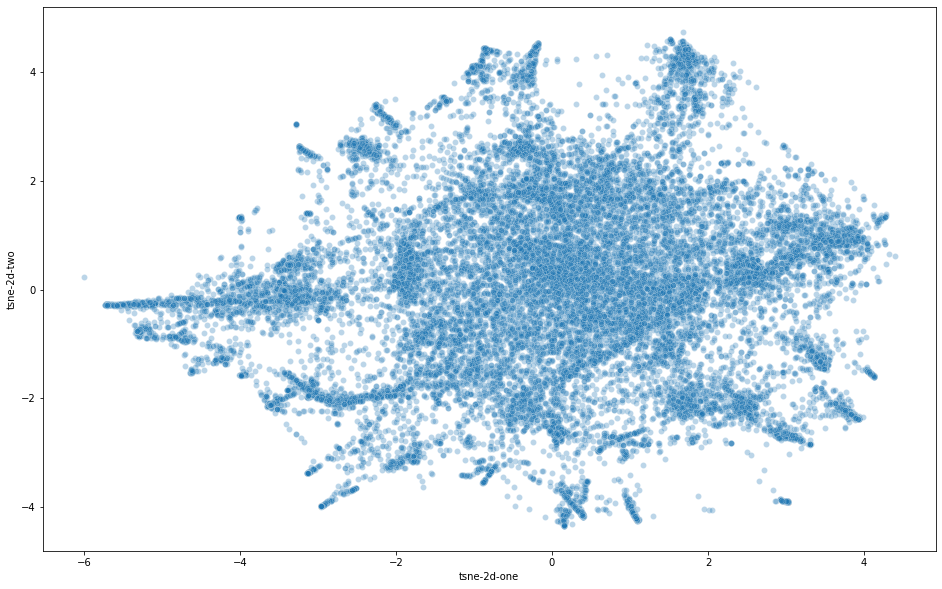

In [131]:
df_nes["tsne-2d-one"] = tsne_results[:, 0]
df_nes["tsne-2d-two"] = tsne_results[:, 1]
df_nes["label"] = df_nes.index

plt.figure(figsize=(16, 10))
sns.scatterplot(
    x="tsne-2d-one",
    y="tsne-2d-two",
    # hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_nes,
    legend="full",
    alpha=0.3,
)

/user/leuven/330/vsc33042/.local/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  del sys.path[0]


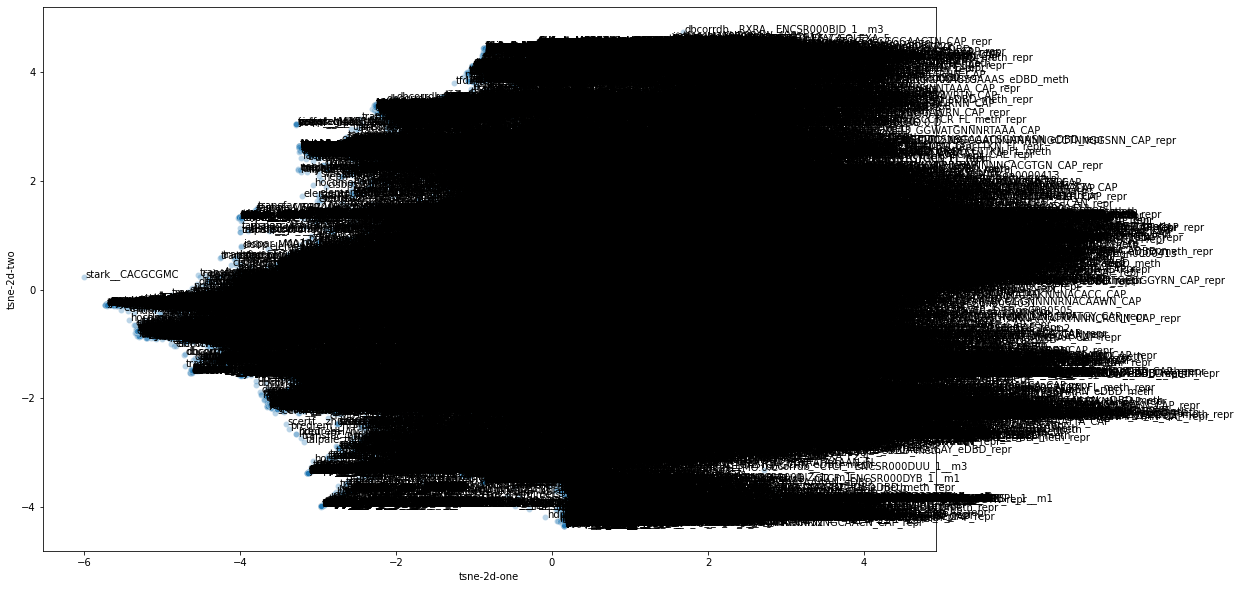

In [130]:
label_point(
    df_nes["tsne-2d-one"],
    df_nes["tsne-2d-two"],
    df_nes["label"],
    plt.gca(),
)

# check which motifs are enriched

In [135]:
import logging
import sys
from typing import List, Optional, Union

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ray
import scipy
import scipy.sparse as sparse
import sklearn
from numpy import array, count_nonzero
from scipy.stats import ranksums
from sklearn.preprocessing import normalize


def markers_one(
    input_mat: Union[pd.DataFrame, "CistopicImputedFeatures"],
    barcode_group: List[List[str]],
    contrast_name: str,
    adjpval_thr: Optional[float] = 0.05,
    log2fc_thr: Optional[float] = 1,
):
    """
    Find differential imputed features.
    Parameters
    ---------
    input_mat: :class:`pd.DataFrame` or :class:`CistopicImputedFeatures`
        A data frame or a cisTopic imputation data object.
    barcode_group: List
        List of length 2, including foreground cells on the first slot and background on the second.
    contrast_name: str
        Name of the contrast
    adjpval_thr: float, optional
        Adjusted p-values threshold. Default: 0.05
    log2fc_thr: float, optional
        Log2FC threshold. Default: np.log2(1.5)
    Return
    ------
    List
        `class::pd.DataFrame` with the selected features and logFC and adjusted p-values.
    """
    # Create cisTopic logger
    level = logging.INFO
    log_format = "%(asctime)s %(name)-12s %(levelname)-8s %(message)s"
    handlers = [logging.StreamHandler(stream=sys.stdout)]
    logging.basicConfig(level=level, format=log_format, handlers=handlers)
    log = logging.getLogger("cisTopic")

    if isinstance(input_mat, pd.DataFrame):
        mat = input_mat.values
        features = input_mat.index.tolist()
        samples = input_mat.columns
    else:
        mat = input_mat.mtx
        features = input_mat.feature_names
        samples = input_mat.cell_names

    fg_cells_index = get_position_index(barcode_group[0], samples)
    bg_cells_index = get_position_index(barcode_group[1], samples)
    log.info("Formatting data for " + contrast_name)
    if sparse.issparse(mat):
        fg_mat = mat[:, fg_cells_index].toarray()
        bg_mat = mat[:, bg_cells_index].toarray()
    else:
        fg_mat = mat[:, fg_cells_index]
        bg_mat = mat[:, bg_cells_index]

    log.info("Computing p-value for " + contrast_name)
    wilcox_test = [ranksums(fg_mat[x], y=bg_mat[x]) for x in range(mat.shape[0])]
    log.info("Computing log2FC for " + contrast_name)
    logFC = np.log2(
        (np.mean(fg_mat, axis=1) + 10 ** -12) / (np.mean(bg_mat, axis=1) + 10 ** -12)
    ).tolist()

    pvalue = [wilcox_test[x].pvalue for x in range(len(wilcox_test))]
    adj_pvalue = p_adjust_bh(pvalue)
    name = [contrast_name] * len(adj_pvalue)
    markers_dataframe = pd.DataFrame(
        [logFC, adj_pvalue, name],
        index=["Log2FC", "Adjusted_pval", "Contrast"],
        columns=features,
    ).transpose()
    markers_dataframe = markers_dataframe.loc[
        markers_dataframe["Adjusted_pval"] <= adjpval_thr
    ]
    markers_dataframe = markers_dataframe.loc[markers_dataframe["Log2FC"] >= log2fc_thr]
    markers_dataframe = markers_dataframe.sort_values(
        ["Log2FC", "Adjusted_pval"], ascending=[False, True]
    )
    log.info(contrast_name + " done!")
    return markers_dataframe

In [134]:
find_diff_features()

TypeError: find_diff_features() missing 3 required positional arguments: 'cistopic_obj', 'imputed_features_obj', and 'variable'

In [71]:
df_counts = pd.DataFrame(
    df.groupby(["tech", "donor", "cell_type_short", "FeatureAnnotations"]).size()
)
df_counts = (
    df_counts.reset_index()
    .sort_values(by=["tech", "donor", "cell_type_short", 0], ascending=False)
    .set_index(["tech", "donor", "cell_type_short", "FeatureAnnotations"])
)
df_counts

0
tech        donor   cell_type_short  FeatureAnnotations    
s3atac      sampleB Cytotoxic_T_cell CEBPB               38
                                     RELA                31
                                     SPI1                30
                                     ELF1                22
                                     ELF5                19
...                                                      ..
10xmultiome sampleA B_cell           ZRSR2                1
                                     ZSCAN1               1
                                     ZSCAN10              1
                                     ZSCAN30              1
                                     ZSCAN32              1

[87769 rows x 1 columns]

In [115]:
print(df_counts)

                                                          0
tech        donor   cell_type_short  FeatureAnnotations    
s3atac      sampleB Cytotoxic_T_cell CEBPB               38
                                     RELA                31
                                     SPI1                30
                                     ELF1                22
                                     ELF5                19
...                                                      ..
10xmultiome sampleA B_cell           ZRSR2                1
                                     ZSCAN1               1
                                     ZSCAN10              1
                                     ZSCAN30              1
                                     ZSCAN32              1

[87769 rows x 1 columns]


In [114]:
df_counts[0].groupby(level=-2, group_keys=False).nlargest(
    3,
    keep="all",
)

tech      donor    cell_type_short      FeatureAnnotations
mtscatac  sampleB  B_cell               CTCF                  470
hydrop    sampleA  B_cell               CTCF                  440
10xv2     sampleB  B_cell               CTCF                  422
hydrop    sampleB  CD14+_monocyte       CTCF                  986
10xv11    sampleA  CD14+_monocyte       CTCF                  637
10xv2     sampleA  CD14+_monocyte       CTCF                  604
          sampleB  CD16+_monocyte       CTCF                  414
mtscatac  sampleB  CD16+_monocyte       CTCF                  328
10xv2     sampleA  CD16+_monocyte       CTCF                  210
mtscatac  sampleB  CD4+_T_cell          CTCF                  647
hydrop    sampleB  CD4+_T_cell          CTCF                  615
10xv11    sampleB  CD4+_T_cell          CTCF                  610
mtscatac  sampleA  Cytotoxic_T_cell     CTCF                  640
          sampleB  Cytotoxic_T_cell     CTCF                  632
hydrop    sampleB

In [63]:
df_filtered_counts.groupby("tech").nlargest(5, columns=0)

AttributeError: 'DataFrameGroupBy' object has no attribute 'nlargest'

In [58]:
df_filtered_counts.nlargest(5, columns=0)

,,,,0
tech,donor,cell_type_short,FeatureAnnotations,
10xv2,sampleB,B_cell,CTCF,153
mtscatac,sampleB,CD4+_T_cell,CTCF,139
hydrop,sampleB,Cytotoxic_T_cell,SPI1,135
mtscatac,sampleB,B_cell,CTCF,115
10xmultiome,sampleB,Cytotoxic_T_cell,SPI1,110


In [48]:
df_filtered_counts[0].nlargest(5)

tech         donor    cell_type_short   FeatureAnnotations
10xv2        sampleB  B_cell            CTCF                  153
mtscatac     sampleB  CD4+_T_cell       CTCF                  139
hydrop       sampleB  Cytotoxic_T_cell  SPI1                  135
mtscatac     sampleB  B_cell            CTCF                  115
10xmultiome  sampleB  Cytotoxic_T_cell  SPI1                  110
Name: 0, dtype: int64

In [11]:
df_top50 = df[df["rank_within_GeneSignatureID"] <= 50]

In [12]:
df_top50

,#GeneSignatureID,Rank,FeatureID,FeatureDescription,FeatureAnnotations,FeatureDatabase,AUC,NES,CandidateTargetIDs,TopTargetIDs,TopTargetRanks,sample,cell_type,sample__cell_type,tech,rank_within_GeneSignatureID
0,VIB_10xv2_2.FIXEDCELLS__sampleA_Cytotoxic_T_ce...,1,dbcorrdb__CEBPB__ENCSR000EFM_1__m1,"CEBPB (ENCSR000EFM-1, motif 1)",CEBPB,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.052624,8.758922,chr1:23897169-23897384;chr12:118307075-1183074...,chr1:23897169-23897384;chr12:118307075-1183074...,904;1890;4351;4487;13278,VIB_10xv2_2.FIXEDCELLS,sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_...,VIB_10xv2_2.FIXEDCELLS__sampleA_Cytotoxic_T_ce...,10xv2,1.0
1,VIB_10xv2_2.FIXEDCELLS__sampleA_Cytotoxic_T_ce...,2,hocomoco__NFIL3_HUMAN.H11MO.0.D,NFIL3_HUMAN,NFIL3,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.049558,8.222231,chr1:23897169-23897384;chr1:107877173-10787749...,chr1:23897169-23897384;chr1:107877173-10787749...,1362;2268;2955;6943;12137,VIB_10xv2_2.FIXEDCELLS,sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_...,VIB_10xv2_2.FIXEDCELLS__sampleA_Cytotoxic_T_ce...,10xv2,2.0
2,VIB_10xv2_2.FIXEDCELLS__sampleA_Cytotoxic_T_ce...,3,dbcorrdb__CEBPB__ENCSR000EEX_1__m1,"CEBPB (ENCSR000EEX-1, motif 1)",CEBPB,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.048851,8.098532,chr1:23897169-23897384;chr1:107877173-10787749...,chr1:23897169-23897384;chr1:107877173-10787749...,635;2982;4426;5922;14174,VIB_10xv2_2.FIXEDCELLS,sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_...,VIB_10xv2_2.FIXEDCELLS__sampleA_Cytotoxic_T_ce...,10xv2,3.0
3,VIB_10xv2_2.FIXEDCELLS__sampleA_Cytotoxic_T_ce...,4,dbcorrdb__NFE2__ENCSR000FAF_1__m1,"NFE2 (ENCSR000FAF-1, motif 1)",NFE2,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.048401,8.019840,chr3:172135818-172136153;chr8:29373215-2937356...,chr3:172135818-172136153;chr8:29373215-2937356...,1064;1229;2638;9312,VIB_10xv2_2.FIXEDCELLS,sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_...,VIB_10xv2_2.FIXEDCELLS__sampleA_Cytotoxic_T_ce...,10xv2,4.0
4,VIB_10xv2_2.FIXEDCELLS__sampleA_Cytotoxic_T_ce...,5,predrem__nrMotif1111,161_fMuscle_arm-DS17765.M1107,NaN,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.047112,7.794238,chr2:207501864-207502050;chr7:140053867-140054...,chr2:207501864-207502050;chr7:140053867-140054...,244;976;2777;18070,VIB_10xv2_2.FIXEDCELLS,sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_...,VIB_10xv2_2.FIXEDCELLS__sampleA_Cytotoxic_T_ce...,10xv2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570985,CNA_10xv11_3.FIXEDCELLS__sampleB_B_cell_VS_sam...,49,transfac_pro__M07638,I$DA_01: da,"TCF4,TCF3,TCF12",CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.078160,6.894552,chr18:74291418-74291619;chr18:74291234-74291414,chr18:74291418-74291619;chr18:74291234-74291414,71;439,CNA_10xv11_3.FIXEDCELLS,sampleB_B_cell_VS_sampleA_B_cell,CNA_10xv11_3.FIXEDCELLS__sampleB_B_cell_VS_sam...,10xv11,46.0
570986,CNA_10xv11_3.FIXEDCELLS__sampleB_B_cell_VS_sam...,50,predrem__nrMotif2394,338_Skin_Keratinocytes-DS18714.M548,NaN,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.078120,6.890861,chr18:74291418-74291619;chr18:74291234-74291414,chr18:74291418-74291619;chr18:74291234-74291414,44;477,CNA_10xv11_3.FIXEDCELLS,sampleB_B_cell_VS_sampleA_B_cell,CNA_10xv11_3.FIXEDCELLS__sampleB_B_cell_VS_sam...,10xv11,47.0
570987,CNA_10xv11_3.FIXEDCELLS__sampleB_B_cell_VS_sam...,51,transfac_pro__M07371,V$ZEB_Q3: ZEB,ZEB1,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.078037,6.883143,chr18:74291418-74291619;chr18:74291234-74291414,chr18:74291418-74291619;chr18:74291234-74291414,63;481,CNA_10xv11_3.FIXEDCELLS,sampleB_B_cell_VS_sampleA_B_cell,CNA_10xv11_3.FIXEDCELLS__sampleB_B_cell_VS_sam...,10xv11,48.0
570988,CNA_10xv11_3.FIXEDCELLS__sampleB_B_cell_VS_sam...,52,cisbp__M5571,"ID1[gene ID: ""ENSG00000125968"" species: ""Homo ...",ID4,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.078015,6.881130,chr18:74291418-74291619;chr18:74291234-7429141...,chr18:74291418-74291619;chr18:74291234-7429141...,84;466

In [122]:
df_top50_counts = (
    df_top50.groupby(["cell_type", "FeatureAnnotations"]).size().unstack(fill_value=0)
)
df_top50_counts

NameError: name 'df_top50' is not defined

In [14]:
for cell_type in df_top50_counts.index:
    print(cell_type)
    df_sub = df_top50_counts.loc[cell_type].sort_values(ascending=False)
    g = sns.lineplot(data=df_sub[0:20])
    plt.xticks(rotation=45, rotation_mode="anchor", ha="right")
    plt.tight_layout()
    plt.savefig(
        f"cistarget/plots_male_female/{cell_type}__TOP50MOTIFS__top20motifsbyoccurrence.png",
        dpi=150,
        facecolor="white",
    )
    plt.close()

sampleA_B_cell_VS_sampleB_B_cell
sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte
sampleA_CD16+_monocyte_VS_sampleB_CD16+_monocyte
sampleA_CD4+_T_cell_VS_sampleB_CD4+_T_cell
sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_T_cell
sampleA_Dendritic_cell_VS_sampleB_Dendritic_cell
sampleA_Natural_killer_cell_VS_sampleB_Natural_killer_cell
sampleB_B_cell_VS_sampleA_B_cell
sampleB_CD14+_monocyte_VS_sampleA_CD14+_monocyte
sampleB_CD16+_monocyte_VS_sampleA_CD16+_monocyte
sampleB_CD4+_T_cell_VS_sampleA_CD4+_T_cell
sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_T_cell
sampleB_Dendritic_cell_VS_sampleA_Dendritic_cell
sampleB_Natural_killer_cell_VS_sampleA_Natural_killer_cell


# counts per occurrence of motif

In [15]:
df_counts = (
    df.groupby(["#GeneSignatureID", "FeatureAnnotations"]).size().unstack(fill_value=0)
)
df_counts

FeatureAnnotations,A1CF,ABCF2,ABL1,ACAA1,ACO1,ADARB1,"ADNP,ZHX2,SIX5,ZHX1,SIX2,ZHX3,IRX5,IRX4",ADNP2,AEBP2,AFF4,...,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSCAN5C,ZSCAN9,ZSWIM1,ZXDA,ZXDB,ZXDC,ZZZ3
#GeneSignatureID,,,,,,,,,,,,,,,,,,,,,
BRO_mtscatac_1.FIXEDCELLS__sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte__1-2xfoldchange_DARs.ENCODE3_overlap.bed,0,1,0,0,0,0,0,0,0,0,...,1,2,1,0,2,1,1,1,0,1
BRO_mtscatac_1.FIXEDCELLS__sampleA_CD16+_monocyte_VS_sampleB_CD16+_monocyte__1-2xfoldchange_DARs.ENCODE3_overlap.bed,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
BRO_mtscatac_1.FIXEDCELLS__sampleA_CD4+_T_cell_VS_sampleB_CD4+_T_cell__1-2xfoldchange_DARs.ENCODE3_overlap.bed,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
BRO_mtscatac_1.FIXEDCELLS__sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_T_cell__1-2xfoldchange_DARs.ENCODE3_overlap.bed,0,0,1,0,1,1,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
BRO_mtscatac_1.FIXEDCELLS__sampleA_Natural_killer_cell_VS_sampleB_Natural_killer_cell__1-2xfoldchange_DARs.ENCODE3_overlap.bed,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VIB_hydrop_2.FIXEDCELLS__sampleA_B_cell_VS_sampleB_B_cell__1-2xfoldchange_DARs.ENCODE3_overlap.bed,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
VIB_hydrop_2.FIXEDCELLS__sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte__1-2xfoldchange_DARs.ENCODE3_overlap.bed,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
VIB_hydrop_2.FIXEDCELLS__sampleB_B_cell_VS_sampleA_B_cell__1-2xfoldchange_DARs.ENCODE3_overlap.bed,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [16]:
for bed in df_counts.index:
    print(bed)
    sample = bed.split("TOP2K")[0]
    df_sub = df_counts.loc[bed].sort_values(ascending=False)
    g = sns.lineplot(data=df_sub[0:20])
    plt.xticks(rotation=45, rotation_mode="anchor", ha="right")
    plt.tight_layout()
    plt.savefig(
        f"cistarget/plots_male_female/{sample}__ALL__top20motifsbyoccurrence.png",
        dpi=150,
        facecolor="white",
    )
    plt.close()

BRO_mtscatac_1.FIXEDCELLS__sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte__1-2xfoldchange_DARs.ENCODE3_overlap.bed
BRO_mtscatac_1.FIXEDCELLS__sampleA_CD16+_monocyte_VS_sampleB_CD16+_monocyte__1-2xfoldchange_DARs.ENCODE3_overlap.bed
BRO_mtscatac_1.FIXEDCELLS__sampleA_CD4+_T_cell_VS_sampleB_CD4+_T_cell__1-2xfoldchange_DARs.ENCODE3_overlap.bed
BRO_mtscatac_1.FIXEDCELLS__sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_T_cell__1-2xfoldchange_DARs.ENCODE3_overlap.bed
BRO_mtscatac_1.FIXEDCELLS__sampleA_Natural_killer_cell_VS_sampleB_Natural_killer_cell__1-2xfoldchange_DARs.ENCODE3_overlap.bed
BRO_mtscatac_1.FIXEDCELLS__sampleB_B_cell_VS_sampleA_B_cell__1-2xfoldchange_DARs.ENCODE3_overlap.bed
BRO_mtscatac_1.FIXEDCELLS__sampleB_CD14+_monocyte_VS_sampleA_CD14+_monocyte__1-2xfoldchange_DARs.ENCODE3_overlap.bed
BRO_mtscatac_1.FIXEDCELLS__sampleB_CD16+_monocyte_VS_sampleA_CD16+_monocyte__1-2xfoldchange_DARs.ENCODE3_overlap.bed
BRO_mtscatac_1.FIXEDCELLS__sampleB_CD4+_T_cell_VS_sampleA_CD4+_T_cell__1

# # per cell type over all:


In [54]:
df_counts = df.groupby(["cell_type", "FeatureAnnotations"]).size().unstack(fill_value=0)
df_counts

FeatureAnnotations,A1CF,ABCF2,ABL1,ACAA1,ACO1,ADARB1,"ADNP,ZHX2,SIX5,ZHX1,SIX2,ZHX3,IRX5,IRX4",ADNP2,AEBP2,AFF4,...,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSCAN5C,ZSCAN9,ZSWIM1,ZXDA,ZXDB,ZXDC,ZZZ3
cell_type,,,,,,,,,,,,,,,,,,,,,
sampleA_B_cell_VS_sampleB_B_cell,1,1,1,1,6,6,0,1,4,1,...,14,3,0,0,5,1,12,12,2,1
sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte,6,2,6,1,12,5,2,1,7,7,...,39,4,1,3,10,2,17,13,9,4
sampleA_CD16+_monocyte_VS_sampleB_CD16+_monocyte,1,0,3,0,3,1,0,0,0,1,...,4,0,0,0,1,0,2,3,1,0
sampleA_CD4+_T_cell_VS_sampleB_CD4+_T_cell,1,0,1,3,11,1,0,2,3,5,...,34,3,1,0,5,0,19,19,4,3
sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_T_cell,1,2,8,4,13,6,0,2,7,6,...,18,4,3,0,4,0,14,13,5,2
sampleA_Dendritic_cell_VS_sampleB_Dendritic_cell,0,1,0,0,1,1,0,0,2,1,...,3,0,0,0,0,0,0,0,0,0
sampleA_Natural_killer_cell_VS_sampleB_Natural_killer_cell,1,1,4,0,2,4,1,1,2,2,...,10,5,1,0,3,0,4,5,1,0
sampleB_B_cell_VS_sampleA_B_cell,1,1,6,2,8,6,0,1,5,3,...,25,2,0,0,4,0,5,4,2,4
sampleB_CD14+_monocyte_VS_sampleA_CD14+_monocyte,4,1,6,3,12,7,2,1,3,4,...,67,6,1,1,10,0,10,9,4,4


In [60]:
df_counts.sum(axis=0).sort_values(ascending=False)

FeatureAnnotations
CTCF                                        18375
POLR2A                                       4326
ELF1                                         4276
ETS1                                         3619
SPI1                                         3579
                                            ...  
NKX2-1,OTX1,OTX2                                1
ARID3A,YY1                                      1
NFIC,NFIB,NFIA                                  1
ETS1,GATA6,GATA4,GATA5,GATA2,GATA3,GATA1        1
FOXE3                                           1
Length: 2930, dtype: int64

In [18]:
for cell_type in df_counts.index:
    print(cell_type)
    df_sub = df_counts.loc[cell_type].sort_values(ascending=False)
    g = sns.lineplot(data=df_sub[0:20])
    plt.xticks(rotation=45, rotation_mode="anchor", ha="right")
    plt.tight_layout()
    plt.savefig(
        f"cistarget/plots_male_female/{cell_type}__ALL__top20motifsbyoccurrence.png",
        dpi=150,
        facecolor="white",
    )
    plt.close()

sampleA_B_cell_VS_sampleB_B_cell
sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte
sampleA_CD16+_monocyte_VS_sampleB_CD16+_monocyte
sampleA_CD4+_T_cell_VS_sampleB_CD4+_T_cell
sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_T_cell
sampleA_Dendritic_cell_VS_sampleB_Dendritic_cell
sampleA_Natural_killer_cell_VS_sampleB_Natural_killer_cell
sampleB_B_cell_VS_sampleA_B_cell
sampleB_CD14+_monocyte_VS_sampleA_CD14+_monocyte
sampleB_CD16+_monocyte_VS_sampleA_CD16+_monocyte
sampleB_CD4+_T_cell_VS_sampleA_CD4+_T_cell
sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_T_cell
sampleB_Dendritic_cell_VS_sampleA_Dendritic_cell
sampleB_Natural_killer_cell_VS_sampleA_Natural_killer_cell


# Ridge plot for NES scores

only plot top 50, otherwise the distributions are indistinguishable 

In [19]:
order = [
    "10xv1",
    "10xv11",
    "10xv2",
    "10xmultiome",
    "mtscatac",
    "ddseq",
    "hydrop",
    "s3atac",
]

In [20]:
df_top50

,#GeneSignatureID,Rank,FeatureID,FeatureDescription,FeatureAnnotations,FeatureDatabase,AUC,NES,CandidateTargetIDs,TopTargetIDs,TopTargetRanks,sample,cell_type,sample__cell_type,tech,rank_within_GeneSignatureID
0,VIB_10xv2_2.FIXEDCELLS__sampleA_Cytotoxic_T_ce...,1,dbcorrdb__CEBPB__ENCSR000EFM_1__m1,"CEBPB (ENCSR000EFM-1, motif 1)",CEBPB,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.052624,8.758922,chr1:23897169-23897384;chr12:118307075-1183074...,chr1:23897169-23897384;chr12:118307075-1183074...,904;1890;4351;4487;13278,VIB_10xv2_2.FIXEDCELLS,sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_...,VIB_10xv2_2.FIXEDCELLS__sampleA_Cytotoxic_T_ce...,10xv2,1.0
1,VIB_10xv2_2.FIXEDCELLS__sampleA_Cytotoxic_T_ce...,2,hocomoco__NFIL3_HUMAN.H11MO.0.D,NFIL3_HUMAN,NFIL3,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.049558,8.222231,chr1:23897169-23897384;chr1:107877173-10787749...,chr1:23897169-23897384;chr1:107877173-10787749...,1362;2268;2955;6943;12137,VIB_10xv2_2.FIXEDCELLS,sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_...,VIB_10xv2_2.FIXEDCELLS__sampleA_Cytotoxic_T_ce...,10xv2,2.0
2,VIB_10xv2_2.FIXEDCELLS__sampleA_Cytotoxic_T_ce...,3,dbcorrdb__CEBPB__ENCSR000EEX_1__m1,"CEBPB (ENCSR000EEX-1, motif 1)",CEBPB,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.048851,8.098532,chr1:23897169-23897384;chr1:107877173-10787749...,chr1:23897169-23897384;chr1:107877173-10787749...,635;2982;4426;5922;14174,VIB_10xv2_2.FIXEDCELLS,sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_...,VIB_10xv2_2.FIXEDCELLS__sampleA_Cytotoxic_T_ce...,10xv2,3.0
3,VIB_10xv2_2.FIXEDCELLS__sampleA_Cytotoxic_T_ce...,4,dbcorrdb__NFE2__ENCSR000FAF_1__m1,"NFE2 (ENCSR000FAF-1, motif 1)",NFE2,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.048401,8.019840,chr3:172135818-172136153;chr8:29373215-2937356...,chr3:172135818-172136153;chr8:29373215-2937356...,1064;1229;2638;9312,VIB_10xv2_2.FIXEDCELLS,sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_...,VIB_10xv2_2.FIXEDCELLS__sampleA_Cytotoxic_T_ce...,10xv2,4.0
4,VIB_10xv2_2.FIXEDCELLS__sampleA_Cytotoxic_T_ce...,5,predrem__nrMotif1111,161_fMuscle_arm-DS17765.M1107,NaN,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.047112,7.794238,chr2:207501864-207502050;chr7:140053867-140054...,chr2:207501864-207502050;chr7:140053867-140054...,244;976;2777;18070,VIB_10xv2_2.FIXEDCELLS,sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_...,VIB_10xv2_2.FIXEDCELLS__sampleA_Cytotoxic_T_ce...,10xv2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570985,CNA_10xv11_3.FIXEDCELLS__sampleB_B_cell_VS_sam...,49,transfac_pro__M07638,I$DA_01: da,"TCF4,TCF3,TCF12",CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.078160,6.894552,chr18:74291418-74291619;chr18:74291234-74291414,chr18:74291418-74291619;chr18:74291234-74291414,71;439,CNA_10xv11_3.FIXEDCELLS,sampleB_B_cell_VS_sampleA_B_cell,CNA_10xv11_3.FIXEDCELLS__sampleB_B_cell_VS_sam...,10xv11,46.0
570986,CNA_10xv11_3.FIXEDCELLS__sampleB_B_cell_VS_sam...,50,predrem__nrMotif2394,338_Skin_Keratinocytes-DS18714.M548,NaN,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.078120,6.890861,chr18:74291418-74291619;chr18:74291234-74291414,chr18:74291418-74291619;chr18:74291234-74291414,44;477,CNA_10xv11_3.FIXEDCELLS,sampleB_B_cell_VS_sampleA_B_cell,CNA_10xv11_3.FIXEDCELLS__sampleB_B_cell_VS_sam...,10xv11,47.0
570987,CNA_10xv11_3.FIXEDCELLS__sampleB_B_cell_VS_sam...,51,transfac_pro__M07371,V$ZEB_Q3: ZEB,ZEB1,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.078037,6.883143,chr18:74291418-74291619;chr18:74291234-74291414,chr18:74291418-74291619;chr18:74291234-74291414,63;481,CNA_10xv11_3.FIXEDCELLS,sampleB_B_cell_VS_sampleA_B_cell,CNA_10xv11_3.FIXEDCELLS__sampleB_B_cell_VS_sam...,10xv11,48.0
570988,CNA_10xv11_3.FIXEDCELLS__sampleB_B_cell_VS_sam...,52,cisbp__M5571,"ID1[gene ID: ""ENSG00000125968"" species: ""Homo ...",ID4,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.078015,6.881130,chr18:74291418-74291619;chr18:74291234-7429141...,chr18:74291418-74291619;chr18:74291234-7429141...,84;466

In [21]:
df_top50 = df_top50.set_index("tech")
df_top50.loc[order]

,#GeneSignatureID,Rank,FeatureID,FeatureDescription,FeatureAnnotations,FeatureDatabase,AUC,NES,CandidateTargetIDs,TopTargetIDs,TopTargetRanks,sample,cell_type,sample__cell_type,rank_within_GeneSignatureID
tech,,,,,,,,,,,,,,,
10xv1,VIB_10xv1_2.FIXEDCELLS__sampleB_CD14+_monocyte...,1,hdpi__DDX53,DDX53,DDX53,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.035168,6.153984,chr16:57533421-57533747;chr5:141877299-1418775...,chr16:57533421-57533747;chr5:141877299-1418775...,93;254;842;1139;1173;1619;5067;7968;8616;14385,VIB_10xv1_2.FIXEDCELLS,sampleB_CD14+_monocyte_VS_sampleA_CD14+_monocyte,VIB_10xv1_2.FIXEDCELLS__sampleB_CD14+_monocyte...,1.0
10xv1,VIB_10xv1_2.FIXEDCELLS__sampleB_CD14+_monocyte...,2,cisbp__M1484,M1484,NaN,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.033717,5.862081,chr2:10081000-10081317;chr5:141877124-14187728...,chr2:10081000-10081317;chr5:141877124-14187728...,266;950;1124;1241;3065;3423;4046;4609;12560,VIB_10xv1_2.FIXEDCELLS,sampleB_CD14+_monocyte_VS_sampleA_CD14+_monocyte,VIB_10xv1_2.FIXEDCELLS__sampleB_CD14+_monocyte...,2.0
10xv1,VIB_10xv1_2.FIXEDCELLS__sampleB_CD14+_monocyte...,3,hdpi__MSI1,MSI1,MSI1,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.033685,5.855748,chr1:3775946-3776296;chr14:91402459-91402747;c...,chr1:3775946-3776296;chr14:91402459-91402747;c...,1418;1562;1947;2297;2734;2768;4307;4504;8295;1...,VIB_10xv1_2.FIXEDCELLS,sampleB_CD14+_monocyte_VS_sampleA_CD14+_monocyte,VIB_10xv1_2.FIXEDCELLS__sampleB_CD14+_monocyte...,3.0
10xv1,VIB_10xv1_2.FIXEDCELLS__sampleB_CD14+_monocyte...,4,cisbp__M1162,M1162,NaN,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.033169,5.751984,chr2:10081000-10081317;chr1:2230680-2231018;ch...,chr2:10081000-10081317;chr1:2230680-2231018;ch...,872;1221;1435;1832;2210;3339;3611;6797;9580;18...,VIB_10xv1_2.FIXEDCELLS,sampleB_CD14+_monocyte_VS_sampleA_CD14+_monocyte,VIB_10xv1_2.FIXEDCELLS__sampleB_CD14+_monocyte...,4.0
10xv1,VIB_10xv1_2.FIXEDCELLS__sampleB_CD14+_monocyte...,5,cisbp__M0387,M0387,NaN,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.033145,5.747112,chr16:57533421-57533747;chr5:141877299-1418775...,chr16:57533421-57533747;chr5:141877299-1418775...,24;827;842;1735;1837;4441;4713;5485,VIB_10xv1_2.FIXEDCELLS,sampleB_CD14+_monocyte_VS_sampleA_CD14+_monocyte,VIB_10xv1_2.FIXEDCELLS__sampleB_CD14+_monocyte...,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s3atac,OHS_s3atac_1.FIXEDCELLS__sampleB_Cytotoxic_T_c...,46,transfac_pro__M04711,V$SPI1_07: PU.1,SPI1,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.021468,9.712062,chr2:121611721-121612070;chr4:102862085-102862...,chr2:121611721-121612070;chr4:102862085-102862...,24;58;85;90;122;131;134;170;190;196;198;205;22...,OHS_s3atac_1.FIXEDCELLS,sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_...,OHS_s3atac_1.FIXEDCELLS__sampleB_Cytotoxic_T_c...,46.0
s3atac,OHS_s3atac_1.FIXEDCELLS__sampleB_Cytotoxic_T_c...,47,dbcorrdb__TBL1XR1__ENCSR000DYZ_1__m1,"TBL1XR1 (ENCSR000DYZ-1, motif 1)",TBL1XR1,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.021107,9.518788,chr1:36123376-36123717;chr6:1665273-1665581;ch...,chr1:36123376-36123717;chr6:1665273-1665581;ch...,41;47;99;198;199;206;219;227;232;236;240;312;3...,OHS_s3atac_1.FIXEDCELLS,sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_...,OHS_s3atac_1.FIXEDCELLS__sampleB_Cytotoxic_T_c...,47.0
s3atac,OHS_s3atac_1.FIXEDCELLS__sampleB_Cytotoxic_T_c...,48,homer__AGAGGAAGTG_PU.1,PU.1(ETS)/ThioMac-PU.1-ChIP-Seq(GSE21512)/Homer,SPI1,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.021054,9.490371,chr2:121611721-121612070;chr2:234572041-234572...,chr2:121611721-121612070;chr2:234572041-234572...,30;123;127;151;200;226;242;255;273;279;311;325...,OHS_s3atac_1.FIXEDCELLS,sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_...,OHS_s3atac_1.FIXEDCELLS__sampleB_Cytotoxic_T_c...,48.0


In [22]:
df_top50["tech"] = df_top50.index

/opt/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/opt/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/opt/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/opt/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/opt/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed

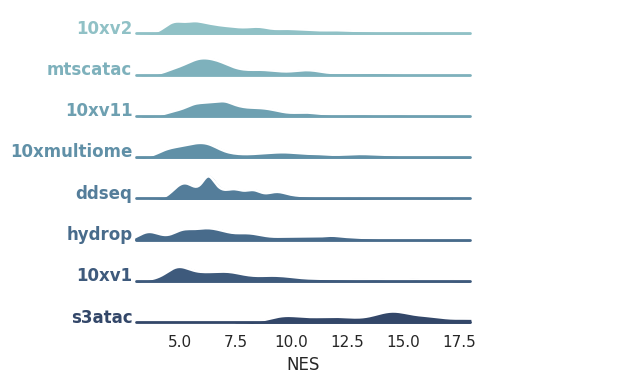

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.5)
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-0.25, light=0.7)
g = sns.FacetGrid(
    df_top50, row="tech", hue="tech", aspect=15, height=0.5, palette=pal, xlim=[3, 18]
)

# Draw the densities in a few steps
g.map(
    sns.kdeplot,
    "NES",
    bw_adjust=0.5,
    clip_on=False,
    clip=[3, 18],
    fill=True,
    alpha=1,
    linewidth=1.5,
)
g.map(sns.kdeplot, "NES", clip_on=False, color="w", lw=2, bw_adjust=0.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(
        -0.01,
        0.2,
        label,
        fontweight="bold",
        color=color,
        ha="right",
        va="center",
        transform=ax.transAxes,
    )


g.map(label, x="NES")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-0.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
# g.xlim([0, 15])
g.despine(bottom=True, left=True)
plt.tight_layout()
plt.savefig("plots_pub/nes_ridgeplot_male_female.png", dpi=300, facecolor="white")

# repeat the above, but now for common motif only

In [36]:
split_df = pd.DataFrame(df.groupby(["cell_type", "sample"])["FeatureID"].unique())

In [37]:
split_df

FeatureID
cell_type                                          sample                                                                      
sampleA_B_cell_VS_sampleB_B_cell                   CNA_10xv11_1.FIXEDCELLS    [homer__ACAGGATGTGGT_ETS_RUNX, tfdimers__MD000...
                                                   CNA_10xv11_2.FIXEDCELLS    [homer__ACAGGATGTGGT_ETS_RUNX, taipale_cyt_met...
                                                   CNA_10xv11_3.FIXEDCELLS    [homer__ACAGGATGTGGT_ETS_RUNX, tfdimers__MD000...
                                                   CNA_10xv11_5.FIXEDCELLS    [taipale__SPIB_DBD_AAAAAGMGGAAGTN, cisbp__M586...
                                                   CNA_10xv2_1.FIXEDCELLS     [taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL, cisb...
...                                                                                                                         ...
sampleB_Natural_killer_cell_VS_sampleA_Natural_... CNA_10xv11_2.FIXEDCELLS    [predrem__nrMotif2381, fantom__motif36_AAGGAGR...
                                                   HAR_ddseq_1.FIXEDCELLS     [scertf__foat.ADR1, transfac_pro__M01556, tran...
                                                   MDC_mtscatac_1.FIXEDCELLS  [swissregulon__hs__DBP.p2, hocomoco__FLI1_HUMA...
                                                   MDC_mtscatac_2.FIXEDCELLS  [dbcorrdb__TCF7L2__ENCSR000EXL_1__m1, dbcorrdb...
                                                   VIB_10xv1_2.FIXEDCELLS     [cisbp__M4594, homer__CNNBRGCGCCCCCTGSTGGC_BOR...

[213 rows x 1 columns]

In [46]:
good_samples = df["sample"].unique()

In [47]:
common_motifs = {}
for cell_type in split_df.index.get_level_values(0).unique():
    set_list = []
    # for sample in split_df.loc['B_cell']:
    print(cell_type)
    for sample in good_samples:
        # print(sample)
        if sample in split_df.loc[cell_type].index:
            motifs_set = set(split_df.loc[cell_type].loc[sample]["FeatureID"])
            set_list.append(motifs_set)
        else:
            print(f"\t{sample} not in index for {cell_type}")

    intersection = set.intersection(*set_list)
    # print(set.intersection(*set_list))
    print(len(intersection))
    common_motifs[cell_type] = set.intersection(*set_list)

sampleA_B_cell_VS_sampleB_B_cell
	BRO_mtscatac_2.FIXEDCELLS not in index for sampleA_B_cell_VS_sampleB_B_cell
	BRO_mtscatac_1.FIXEDCELLS not in index for sampleA_B_cell_VS_sampleB_B_cell
	HAR_ddseq_1.FIXEDCELLS not in index for sampleA_B_cell_VS_sampleB_B_cell
	EPF_hydrop_2.FIXEDCELLS not in index for sampleA_B_cell_VS_sampleB_B_cell
	VIB_10xmultiome_1.FIXEDCELLS not in index for sampleA_B_cell_VS_sampleB_B_cell
	CNA_10xmultiome_1.FIXEDCELLS not in index for sampleA_B_cell_VS_sampleB_B_cell
	VIB_hydrop_1.FIXEDCELLS not in index for sampleA_B_cell_VS_sampleB_B_cell
	CNA_hydrop_1.FIXEDCELLS not in index for sampleA_B_cell_VS_sampleB_B_cell
	STA_10xv11_1.FIXEDCELLS not in index for sampleA_B_cell_VS_sampleB_B_cell
	OHS_s3atac_1.FIXEDCELLS not in index for sampleA_B_cell_VS_sampleB_B_cell
	EPF_hydrop_3.FIXEDCELLS not in index for sampleA_B_cell_VS_sampleB_B_cell
	CNA_10xmultiome_2.FIXEDCELLS not in index for sampleA_B_cell_VS_sampleB_B_cell
	STA_10xv11_2.FIXEDCELLS not in index for sampleA